# <span style="color:blue"><center>Genetics and Evolution</center></span><span style="color:green"><center>Assignment Five</center></span>
## <span><center>Hadis Ahmadian</center></span><span ><center>400211524</center></span> 




In [13]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson


### cal_p_q function : 

calculates p and q for a certain generation.

In [1]:
def cal_p_q(X,yp,yq):
    p=0
    q=0
    for x in X:
        if x==0:
            p+=1
        else:
            q+=1
    N=p+q
    p=p/N
    q=q/N
    yp.append(p)
    yq.append(q)
    print("p:",p,"  q:",q)

In [2]:
def cal_p(X,yp):
    p=0
    for x in X:
        if x==0:
            p+=1
    N=30
    p=p/N
    yp.append(p)



our first generation has 30 samples,(15 of type one and 15 of type 2 --> p=q=0.5)
then for creating the next generation we randomly select from our current generation 30 times. the selection is with substitution.
we calculate p and q for each generation and print thier values.

In [7]:
import random
N=30
population=[]
for i in range (15):
    population.append(0)
    population.append(1)
    
random.shuffle(population)
x=[0]
yp=[]
yq=[]
cal_p_q(population,yp,yq)
for i in range(110):
    new_pop=[]
    for j in range(N):
        new_pop.append(random.choice(population))
    population=new_pop
    x.append(i+1)
    cal_p_q(population,yp,yq)



p: 0.5   q: 0.5
p: 0.5666666666666667   q: 0.43333333333333335
p: 0.5666666666666667   q: 0.43333333333333335
p: 0.5   q: 0.5
p: 0.5666666666666667   q: 0.43333333333333335
p: 0.5666666666666667   q: 0.43333333333333335
p: 0.6   q: 0.4
p: 0.5333333333333333   q: 0.4666666666666667
p: 0.5333333333333333   q: 0.4666666666666667
p: 0.3   q: 0.7
p: 0.4   q: 0.6
p: 0.3333333333333333   q: 0.6666666666666666
p: 0.36666666666666664   q: 0.6333333333333333
p: 0.43333333333333335   q: 0.5666666666666667
p: 0.4   q: 0.6
p: 0.3333333333333333   q: 0.6666666666666666
p: 0.3333333333333333   q: 0.6666666666666666
p: 0.36666666666666664   q: 0.6333333333333333
p: 0.43333333333333335   q: 0.5666666666666667
p: 0.3333333333333333   q: 0.6666666666666666
p: 0.5333333333333333   q: 0.4666666666666667
p: 0.6   q: 0.4
p: 0.5   q: 0.5
p: 0.6   q: 0.4
p: 0.6   q: 0.4
p: 0.6333333333333333   q: 0.36666666666666664
p: 0.6666666666666666   q: 0.3333333333333333
p: 0.6666666666666666   q: 0.3333333333333333
p: 

 
here we have the plot of  p and q per generation:

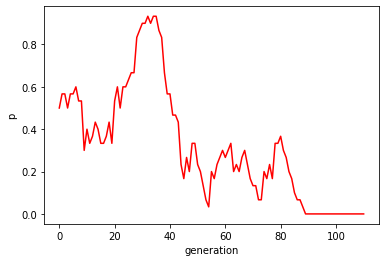

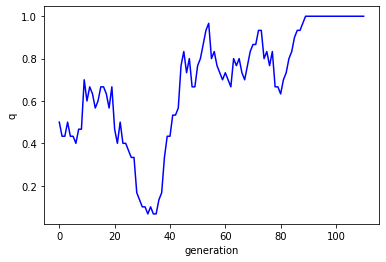

In [8]:
import matplotlib.pyplot as plt

plt.plot(x, yp,color="red")

plt.xlabel('generation')
plt.ylabel('p')

plt.show()

plt.plot(x, yq,color="blue")

plt.xlabel('generation')
plt.ylabel('q')

plt.show()

we can see that in many generations, usually the next state is not the same as the previous state and after a number of generations the final state is p=0 and q=1.
I think the reason behind this is that when in a generation one of the types gets chosen much less than the other by chance, it is very likely that in next generations, it becomes less and less (because there is less samples of it in generatoin and there is a lower chance for it to be chosen) and as a result, it will extinct at the end. 

### fitting  : 

#### 1. N=30 p=q=0.5  (normal)
we can see that with values above, our samples(100,000 samples) fit the normal distribution well.

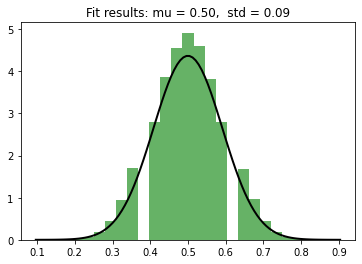

In [10]:
N=30
population=[]
for i in range (15):
    population.append(0)
    population.append(1)
    
random.shuffle(population)
p=[]
cal_p(population,p)
for i in range(100000):
    new_pop=[]
    for j in range(N):
        new_pop.append(random.choice(population))
    cal_p(new_pop,p)

data = p
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

#### 2. N=30 p=0.95 q=0.05  (normal)
we can see that with values above, our samples this time, DO NOT fit the normal distribution very well.

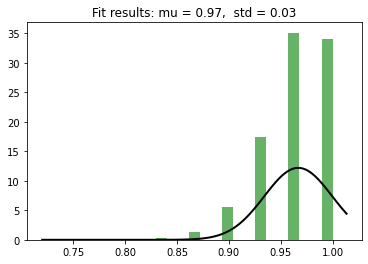

In [11]:
N=30
population=[]
for i in range (29):
    population.append(0)
population.append(1)
    
random.shuffle(population)
p=[]
cal_p(population,p)
for i in range(100000):
    new_pop=[]
    for j in range(N):
        new_pop.append(random.choice(population))
    cal_p(new_pop,p)
    
data = p
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

#### 3. N=30 p=0.95 q=0.05 (poisson)  
we can see that with values above, our samples fit the poission distribution much betetr than normal distribution.

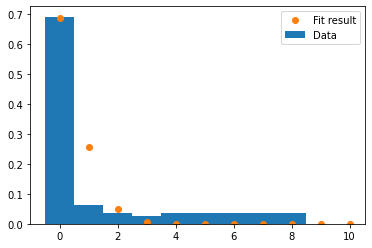

In [29]:
from scipy.optimize import curve_fit
data = p
bins = np.arange(10) - 0.5
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='Data')
bin_middles =(bin_edges[1:] + bin_edges[:-1])
def fit_function(k, lamb):
    return poisson.pmf(k, lamb)
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)
x_plot = np.arange(0, 11)
plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()